## note: still need additional data, soil heat flux, pressure, site elevation data

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
import pandas as pd
import csv
from datetime import datetime
import csv
import os
from datetime import datetime
import re

import pyet
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

C:\Users\skyebensel\AppData\Local\Temp\ipykernel_9612\2953368902.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df=pd.read_csv('LDP_2019.csv')
df1=pd.read_csv('LDP_2020.csv')
df2=pd.read_csv('LDP_2021.csv')

### define tmean for each year

In [3]:
tmean=df['Tmean_C']
tmean1=df1['Tmean_C']
tmean2=df2['Tmean_C']

### calculate pyet for each year

In [25]:
#2019
pet_penman_2019 = pyet.combination.pm(tmean,tmax=df['Tmax_C'],tmin=df['Tmin_C'],wind=df['WindSpeed_m/s'],rs=df['SolarRadiation_MJ/m2/day'],rn=df['NetRadiation_MJ/m2/day'],rhmax=df['RelativeHumidity_max'],
                    elevation=1850,
                    rhmin=df['RelativeHumidity_min'],rh=df['RelativeHumidity_mean'])
#2020
pet_penman_2020= pyet.combination.pm(tmean1,tmax=df1['Tmax_C'],tmin=df1['Tmin_C'],wind=df1['WindSpeed_m/s'],rs=df1['SolarRadiation_MJ/m2/day'],rn=df1['NetRadiation_MJ/m2/day'],rhmax=df1['RelativeHumidity_max'],
                    elevation=1850,
                    rhmin=df1['RelativeHumidity_min'],rh=df1['RelativeHumidity_mean'])

#2021
pet_penman_2021 = pyet.combination.pm(tmean2,tmax=df2['Tmax_C'],tmin=df2['Tmin_C'],wind=df2['WindSpeed_m/s'],rs=df2['SolarRadiation_MJ/m2/day'],rn=df2['NetRadiation_MJ/m2/day'],rhmax=df2['RelativeHumidity_max'],
                    elevation=1850,
                    rhmin=df2['RelativeHumidity_min'],rh=df2['RelativeHumidity_mean'])

In [19]:
#add pyet to df 

In [26]:
df['pet_penman_2019']=pet_penman_2019
df1['pet_penman_2020']=pet_penman_2020
df2['pet_penman_2021']=pet_penman_2021
#need to transform datetime 
df['Date'] = pd.to_datetime(df['Date'])
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])

### Does this make sense

In [31]:
df
df.to_csv('LDP_2019_penman.csv', index=False)

In [28]:
df1

,Date,Precipitation_mm,Tmin_C,Tmax_C,Tmean_C,SolarRadiation_MJ/m2/day,NetRadiation_MJ/m2/day,RelativeHumidity_min,RelativeHumidity_max,RelativeHumidity_mean,WindDirection_degree,WindSpeed_m/s,SnowDepth_cm,pet_penman_2020
0,2020-01-01,172.3,-3.6,0.2,-1.166667,2.160252,-0.273276,91.40,98.20,96.962500,276.504167,3.550417,754.05,0.091858
1,2020-01-02,305.9,-3.8,-2.4,-3.287500,3.596904,-1.130256,87.80,96.40,93.595833,303.937500,3.487500,769.30,0.052779
2,2020-01-03,335.4,-1.6,4.3,1.354167,5.519052,-0.954684,30.73,87.80,59.862917,234.766667,3.138333,738.95,0.981572
3,2020-01-04,359.9,-4.0,5.5,0.225000,5.952240,-1.205460,35.10,90.00,61.772083,225.700000,3.680000,740.67,1.090838
4,2020-01-05,393.7,-6.1,-3.3,-4.300000,2.872980,-0.386532,55.09,95.50,83.247917,211.054167,1.788333,797.44,0.262718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2020-12-27,18177.7,-6.3,-0.6,-3.741667,11.271096,-0.711468,63.64,95.60,87.190417,161.708333,0.750833,776.28,0.051655
362,2020-12-28,18191.2,-4.7,4.8,-1.158333,11.230380,-2.554236,26.54,68.36,45.324583,162.595833,0.677083,738.06,0.031557
363,2020-12-29,18201.4,-5.2,-1.3,-3.237500,9.936432,-2.374992,37.48,60.28,50.066667,310.837500,1.833333,727.75,0.393706
364,2020-12-30,18213.0,-3.9,-2.4,-3.245833,3.176784,-0.606852,42.21,92.10,67.822083,207.979167,2.559583,722.96,0.484623


In [29]:
df2

,Date,Precipitation_mm,Tmin_C,Tmax_C,Tmean_C,SolarRadiation_MJ/m2/day,NetRadiation_MJ/m2/day,RelativeHumidity_min,RelativeHumidity_max,RelativeHumidity_mean,WindDirection_degree,WindSpeed_m/s,SnowDepth_cm,pet_penman_2021
0,2020-01-01,172.3,-3.6,0.2,-1.166667,2.160252,-0.273276,91.40,98.20,96.962500,276.504167,3.550417,754.05,0.091858
1,2020-01-02,305.9,-3.8,-2.4,-3.287500,3.596904,-1.130256,87.80,96.40,93.595833,303.937500,3.487500,769.30,0.052779
2,2020-01-03,335.4,-1.6,4.3,1.354167,5.519052,-0.954684,30.73,87.80,59.862917,234.766667,3.138333,738.95,0.981572
3,2020-01-04,359.9,-4.0,5.5,0.225000,5.952240,-1.205460,35.10,90.00,61.772083,225.700000,3.680000,740.67,1.090838
4,2020-01-05,393.7,-6.1,-3.3,-4.300000,2.872980,-0.386532,55.09,95.50,83.247917,211.054167,1.788333,797.44,0.262718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2020-12-27,18177.7,-6.3,-0.6,-3.741667,11.271096,-0.711468,63.64,95.60,87.190417,161.708333,0.750833,776.28,0.051655
362,2020-12-28,18191.2,-4.7,4.8,-1.158333,11.230380,-2.554236,26.54,68.36,45.324583,162.595833,0.677083,738.06,0.031557
363,2020-12-29,18201.4,-5.2,-1.3,-3.237500,9.936432,-2.374992,37.48,60.28,50.066667,310.837500,1.833333,727.75,0.393706
364,2020-12-30,18213.0,-3.9,-2.4,-3.245833,3.176784,-0.606852,42.21,92.10,67.822083,207.979167,2.559583,722.96,0.484623


### Plot pet

C:\Users\skyebensel\AppData\Local\Temp\ipykernel_9612\3141022530.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis', 4)
C:\Users\skyebensel\AppData\Local\Temp\ipykernel_9612\3141022530.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45,fontsize=5)
C:\Users\skyebensel\AppData\Local\Temp\ipykernel_9612\3141022530.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45,fontsize=5)


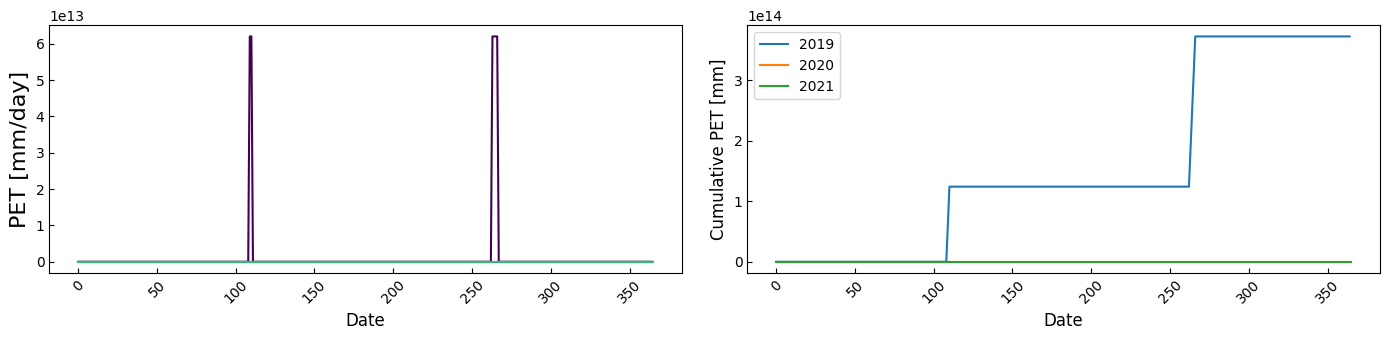

In [30]:
from matplotlib import cm
viridis = cm.get_cmap('viridis', 4)
colors = [viridis(i) for i in range(0, 4)]

fig, axs = plt.subplots(figsize=(14,3.5), ncols=2)

#add years to this 
axs[0].plot(df['pet_penman_2019'],c=colors[0],label="2019")
axs[0].plot(df1['pet_penman_2020'],c=colors[1],label="2020")
axs[0].plot(df2['pet_penman_2021'],c=colors[2],label="2021")


axs[0].set_ylabel("PET [mm/day]", fontsize=16)

#add years to this 
axs[1].plot(df['pet_penman_2019'].cumsum(),label="2019")
axs[1].plot(df1['pet_penman_2020'].cumsum(),label="2020")
axs[1].plot(df2['pet_penman_2021'].cumsum(),label="2021")

axs[1].set_ylabel("Cumulative PET [mm]", fontsize=12)

for i in (0,1):
    axs[i].set_xlabel("Date", fontsize=12)
    #axs[i].set_xticks(df2['Date'][df2['Date'].dt.day == 1])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45,fontsize=5)
    axs[i].tick_params("both", direction="in", labelsize=10)
plt.legend()
plt.tight_layout()
#plt.savefig("Figure1.png", dpi=300)